In [ ]:
!pip install -q sentencepiece

In [ ]:
!pip install -q transformers

In [ ]:
import transformers

##Preprocessing Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from torch import nn, optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv("/content/final_dataset_appendedEverything.csv")
df.dropna()

,Unnamed: 0.2,Unnamed: 0.1,level_0,index,Unnamed: 0,post,Mach,LSRP12,LSRP2,NRSM,Person,dark_triad,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio
0,0,0,0,0,0,my heart my soul..T-T,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
1,1,1,2,2,2,Free speech is a joke in this country,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
2,2,2,5,5,5,Make 500 sequels I don't care.Make another Jus...,68,1.3,2.5,3,2,"mach, psycho",76.470588,17.647059,66.666667,33.333333
3,3,3,6,6,6,Everybody wants a piece of the politically cor...,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
4,4,4,10,10,10,And that's how a movement dies.,68,1.3,2.5,3,2,"mach, psycho",83.333333,16.666667,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,8687,8687,12710,12745,12745,TWO SUPERHUMANS IN ONE FRAME <3,53,1.9,3.1,19,100,"psycho, narcisist",71.428571,14.285714,50.000000,50.000000
8688,8688,8688,12711,12746,12746,Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...,53,1.9,3.1,19,100,"psycho, narcisist",33.333333,55.555556,60.000000,40.000000
8689,8689,8689,12713,12748,12748,<3 <3,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,0.000000,0.000000,0.000000
8690,8690,8690,12714,12749,12749,Madrid Triumphs!! :D,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,25.000000,100.000000,0.000000


In [ ]:
mean = df['Mach'].mean()
mean

15.771514035895075

In [ ]:
def compare(ratings):
    rating = int(ratings)
    if rating > 16:
        return 1
    else:
        return 0

In [ ]:
df['Trait'] = df.Mach.apply(compare)

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,level_0,index,Unnamed: 0,post,Mach,LSRP12,LSRP2,NRSM,Person,dark_triad,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio,Trait
0,0,0,0,0,0,my heart my soul..T-T,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
1,1,1,2,2,2,Free speech is a joke in this country,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
2,2,2,5,5,5,Make 500 sequels I don't care.Make another Jus...,68,1.3,2.5,3,2,"mach, psycho",76.470588,17.647059,66.666667,33.333333,0
3,3,3,6,6,6,Everybody wants a piece of the politically cor...,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
4,4,4,10,10,10,And that's how a movement dies.,68,1.3,2.5,3,2,"mach, psycho",83.333333,16.666667,50.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,8687,8687,12710,12745,12745,TWO SUPERHUMANS IN ONE FRAME <3,53,1.9,3.1,19,100,"psycho, narcisist",71.428571,14.285714,50.000000,50.000000,1
8688,8688,8688,12711,12746,12746,Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...,53,1.9,3.1,19,100,"psycho, narcisist",33.333333,55.555556,60.000000,40.000000,1
8689,8689,8689,12713,12748,12748,<3 <3,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,0.000000,0.000000,0.000000,1
8690,8690,8690,12714,12749,12749,Madrid Triumphs!! :D,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,25.000000,100.000000,0.000000,1


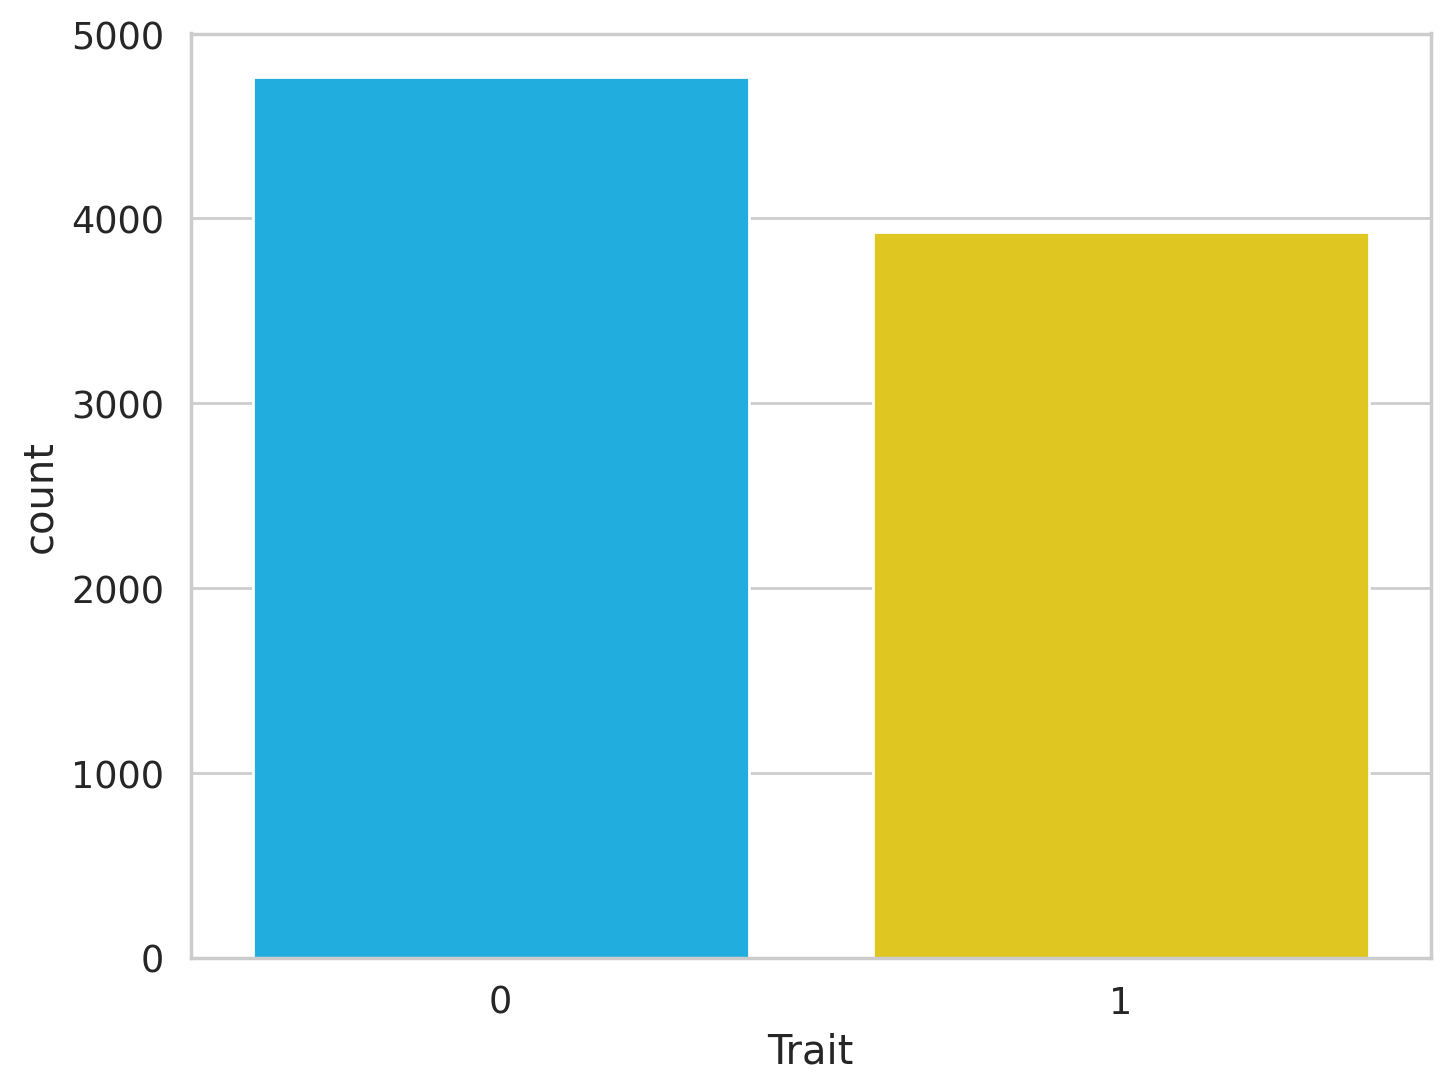

In [ ]:
sns.countplot(data = df, x = 'Trait')
plt.show()

In [ ]:
class_names = ['Not narcissist', 'Narcissist']

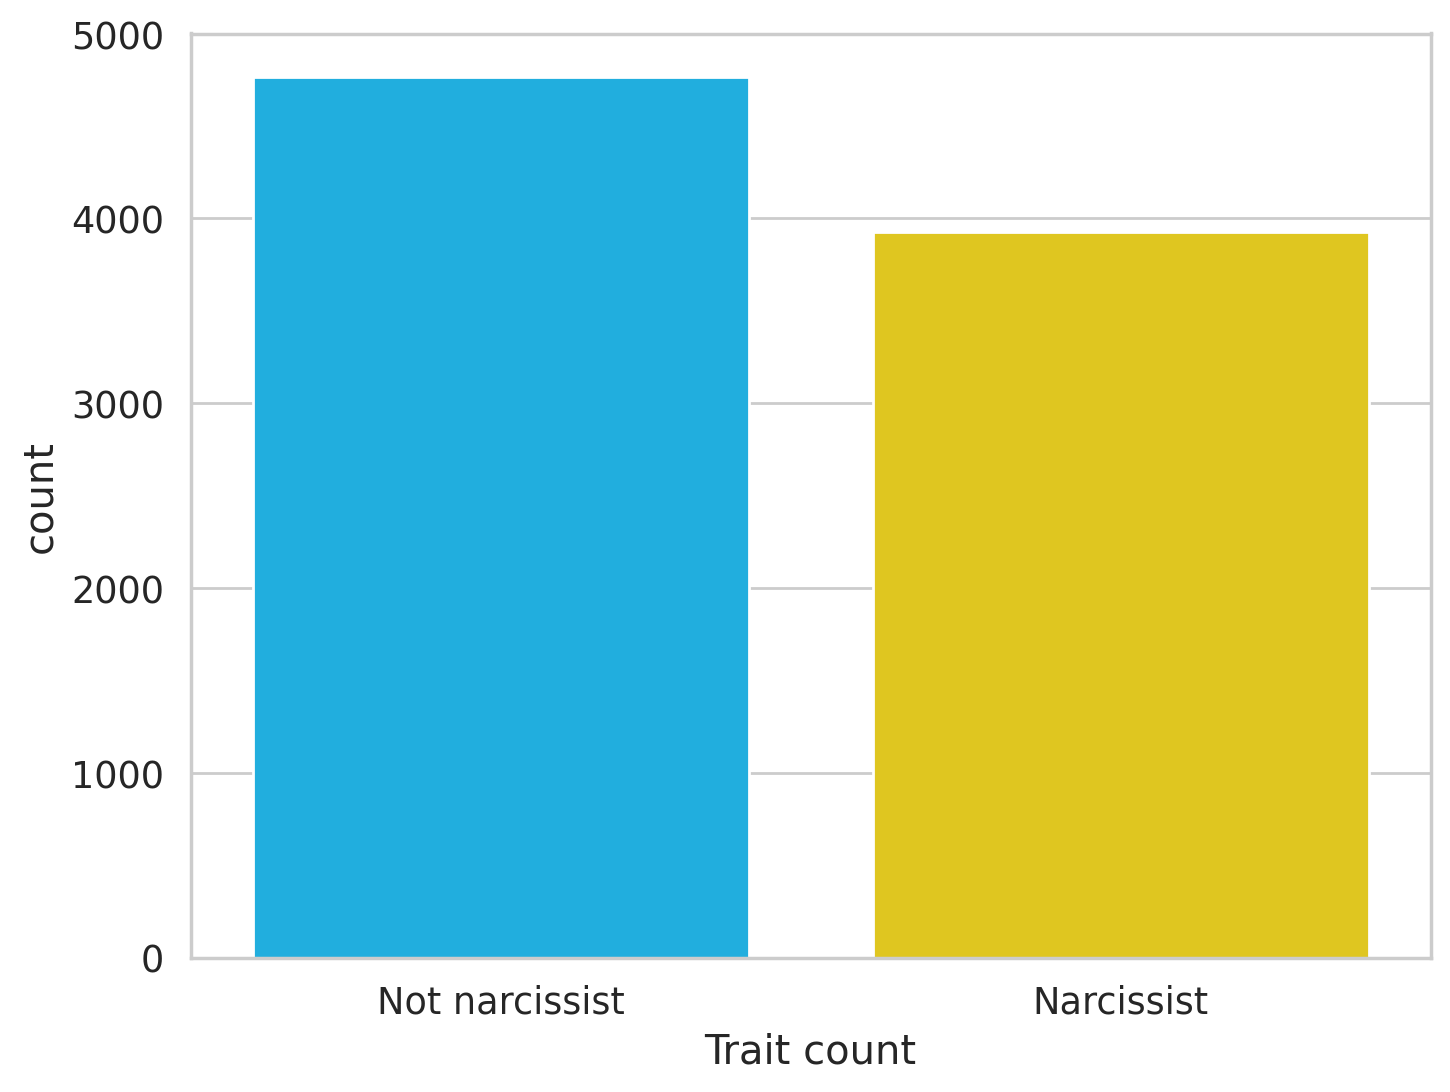

In [ ]:
ax = sns.countplot(data =df, x = 'Trait')
plt.xlabel('Trait count')
ax.set_xticklabels(class_names);

##Text Preprocessing

In [ ]:
# splitting the dataset into test,validation and train
df_train, df_test = train_test_split(df, test_size= 0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size= 0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape
df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,level_0,index,Unnamed: 0,post,Mach,LSRP12,LSRP2,NRSM,Person,dark_triad,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio,Trait
2588,2588,2588,3613,3621,3621,I am gonna have homemade food.\nI am gonna sle...,47,0.0625,0.1,6,30,none,68.181818,31.818182,50.000000,50.000000,0
1844,1844,1844,2538,2546,2546,Don't know what's more tragic...that i kept lo...,49,0.0625,0.1,6,22,none,82.608696,17.391304,42.857143,57.142857,0
8176,8176,8176,12110,12145,12145,মদ্রিচ ইজ লাভ ♥,59,4.0000,2.2,18,96,"mach, psycho, narcisist",20.000000,60.000000,0.000000,0.000000,1
500,500,500,725,725,725,"Hey Girl, Happy Birthday ❤️\nবুক ভরা ভালোবাসা ...",68,3.3000,1.6,31,7,"mach, psycho, narcisist",13.793103,79.310345,100.000000,0.000000,1
7202,7202,7202,10746,10757,10757,Don't waste the food at least instead of treat...,59,3.0000,3.5,15,85,"mach, psycho, narcisist",90.000000,10.000000,0.000000,100.000000,0


In [ ]:
df_test.shape, df_val.shape

((870, 17), (869, 17))

In [ ]:
df.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'level_0', 'index', 'Unnamed: 0',
       'post', 'Mach', 'LSRP12', 'LSRP2', 'NRSM', 'Person', 'dark_triad',
       'eng_usage_ratio', 'bng_usage_ratio', 'eng_switching_ratio',
       'bng_switching_ratio', 'Trait'],
      dtype='object')

In [ ]:
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

MODEL_TYPE = 'xlm-roberta-base'

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_TYPE)

In [ ]:
tokenizer.vocab_size

250002

In [ ]:
tokenizer.special_tokens_map

{'bos_token': '<s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'sep_token': '</s>',
 'pad_token': '<pad>',
 'cls_token': '<s>',
 'mask_token': '<mask>'}

In [ ]:
print('bos_token_id <s>:', tokenizer.bos_token_id)
print('eos_token_id </s>:', tokenizer.eos_token_id)
print('sep_token_id </s>:', tokenizer.sep_token_id)
print('pad_token_id <pad>:', tokenizer.pad_token_id)

bos_token_id <s>: 0
eos_token_id </s>: 2
sep_token_id </s>: 2
pad_token_id <pad>: 1


In [ ]:
MAX_LEN = 10 # This value could be set as 256, 512 etc.

sentence1 = 'Hello there.'

encoded_dict = tokenizer.encode_plus(
            sentence1,                
            add_special_tokens = True,
            truncation=True,     
            pad_to_max_length = True,
            return_attention_mask = True,  
            return_tensors = 'pt' # return pytorch tensors
       )


encoded_dict

{'input_ids': tensor([[    0, 35378,  2685,     5,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
# These have already been converted to torch tensors.
input_ids = encoded_dict['input_ids'][0]
att_mask = encoded_dict['attention_mask'][0]

print(input_ids)
print(att_mask)

tensor([    0, 35378,  2685,     5,     2])
tensor([1, 1, 1, 1, 1])


##Decoding from tokens

In [ ]:
# input_ids from above

input_ids = encoded_dict['input_ids'][0]

print(input_ids)

tensor([    0, 35378,  2685,     5,     2])


In [ ]:
a = tokenizer.decode(input_ids, skip_special_tokens=False)

b = tokenizer.decode(input_ids, skip_special_tokens=True)



print(a)
print(b)

<s> Hello there.</s>
Hello there.


In [ ]:
# Overflowing tokens and Stride
MAX_LEN = 15 # This value could be set as 256, 512 etc.

sentence1 = 'Hello there. How are you? Have a nice day. This is a test?'


encoded_dict = tokenizer.encode_plus(
            sentence1,                
            max_length = MAX_LEN,
            stride=0,
            pad_to_max_length = True,
            return_overflowing_tokens=True,
       )


encoded_dict

{'overflowing_tokens': [83, 10, 3034, 32], 'num_truncated_tokens': 4, 'input_ids': [0, 35378, 2685, 5, 11249, 621, 398, 32, 31901, 10, 26267, 5155, 5, 3293, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
MAX_LEN = 15 # This value could be set as 256, 512 etc.

sentence1 = 'Hello there. How are you? Have a nice day. This is a test?'


encoded_dict = tokenizer.encode_plus(
            sentence1,                
            max_length = MAX_LEN,
            stride=3,
            pad_to_max_length = True,
            return_overflowing_tokens=True,
       )


encoded_dict

{'overflowing_tokens': [5155, 5, 3293, 83, 10, 3034, 32], 'num_truncated_tokens': 4, 'input_ids': [0, 35378, 2685, 5, 11249, 621, 398, 32, 31901, 10, 26267, 5155, 5, 3293, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# Here you can see the overlap.

print(encoded_dict['input_ids'])
print(encoded_dict['overflowing_tokens'])

[0, 35378, 2685, 5, 11249, 621, 398, 32, 31901, 10, 26267, 5155, 5, 3293, 2]
[5155, 5, 3293, 83, 10, 3034, 32]


In [ ]:
MODEL_TYPE = 'xlm-roberta-base'


L_RATE = 2e-5
MAX_LEN = 256

NUM_EPOCHS = 20
BATCH_SIZE = 32


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda:0


In [ ]:
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

# xlm-roberta-large
print('Loading XLMRoberta tokenizer...')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_TYPE)

Loading XLMRoberta tokenizer...


In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
class CompDataset(Dataset):

    def __init__(self, df):
        self.df_data = df



    def __getitem__(self, index):

        # get the sentence from the dataframe
        sentence1 = self.df_data.loc[index, 'post']

        # Process the sentence
        # ---------------------

        encoded_dict = tokenizer.encode_plus(
                    sentence1,                      # Sentences to encode.
                    add_special_tokens = True,      # Add the special tokens.
                    max_length = MAX_LEN,           # Pad & truncate all sentences.
                    pad_to_max_length = True,
                    return_attention_mask = True,   # Construct attn. masks.
                    return_tensors = 'pt',          # Return pytorch tensors.
               )
        
        # These are torch tensors.
        padded_token_list = encoded_dict['input_ids'][0]
        att_mask = encoded_dict['attention_mask'][0]
        
        # Convert the target to a torch tensor
        target = torch.tensor(self.df_data.loc[index, 'Trait'])

        sample = (padded_token_list, att_mask, target)


        return sample


    def __len__(self):
        return len(self.df_data)

In [ ]:
class TestDataset(Dataset):

    def __init__(self, df):
        self.df_data = df



    def __getitem__(self, index):

        # get the sentence from the dataframe
        sentence1 = self.df_data.loc[index, 'post']

        # Process the sentence
        # ---------------------

        encoded_dict = tokenizer.encode_plus(
                    sentence1,                      # Sentence to encode.
                    add_special_tokens = True,      # Add the special tokens.
                    truncation=True,           # Pad & truncate all sentences.
                    padding=True,
                    return_attention_mask = True,   # Construct attn. masks.
                    return_tensors = 'pt',          # Return pytorch tensors.
               )
        
        # These are torch tensors.
        padded_token_list = encoded_dict['input_ids'][0]
        att_mask = encoded_dict['attention_mask'][0]
        
               

        sample = (padded_token_list, att_mask)


        return sample


    def __len__(self):
        return len(self.df_data)

Test the dataloader

In [ ]:
train_data = CompDataset(df_train)
val_data = CompDataset(df_val)
test_data = TestDataset(df_test)

train_dataloader = torch.utils.data.DataLoader(train_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                       num_workers=2)

val_dataloader = torch.utils.data.DataLoader(val_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                       num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                       num_workers=2)



print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

218
28
28


In [ ]:
padded_token_list, att_mask, target = next(iter(train_dataloader))

print(padded_token_list.shape)
print(att_mask.shape)
print(target.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

torch.Size([32, 256])
torch.Size([32, 256])
torch.Size([32])


In [ ]:
# Get one val batch

padded_token_list, att_mask, target = next(iter(val_dataloader))

print(padded_token_list.shape)
print(att_mask.shape)
print(target.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

torch.Size([32, 256])
torch.Size([32, 256])
torch.Size([32])


In [ ]:
# Get one val batch

padded_token_list, att_mask, target = next(iter(val_dataloader))

print(padded_token_list.shape)
print(att_mask.shape)
print(target.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

torch.Size([32, 256])
torch.Size([32, 256])
torch.Size([32])


##Define the Model

In [ ]:
from transformers import XLMRobertaForSequenceClassification

model = XLMRobertaForSequenceClassification.from_pretrained(
    MODEL_TYPE, 
    num_labels = 2, # The number of output labels. 2 for binary classification.
)

# Send the model to the device.
model.to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [ ]:
# Create a batch of train samples
# We will set a small batch size of 8 so that the model's output can be easily displayed.

train_dataloader = torch.utils.data.DataLoader(train_data,
                                        batch_size=8,
                                        shuffle=True,
                                       num_workers=2)

b_input_ids, b_input_mask, b_labels = next(iter(train_dataloader))

print(b_input_ids.shape)
print(b_input_mask.shape)
print(b_labels.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

torch.Size([8, 256])
torch.Size([8, 256])
torch.Size([8])


In [ ]:
# Pass a batch of train samples to the model.

batch = next(iter(train_dataloader))

# Send the data to the device
b_input_ids = batch[0].to(device)
b_input_mask = batch[1].to(device)
b_labels = batch[2].to(device)

# Run the model
outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

# The ouput is a tuple (loss, preds).
outputs

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

SequenceClassifierOutput(loss=tensor(0.7087, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[-0.1099,  0.1915],
        [-0.0876,  0.1736],
        [-0.0911,  0.1600],
        [-0.1454,  0.1958],
        [-0.0965,  0.1772],
        [-0.0942,  0.1957],
        [-0.0713,  0.1561],
        [-0.1521,  0.2302]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
outputs

SequenceClassifierOutput(loss=tensor(0.7087, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[-0.1099,  0.1915],
        [-0.0876,  0.1736],
        [-0.0911,  0.1600],
        [-0.1454,  0.1958],
        [-0.0965,  0.1772],
        [-0.0942,  0.1957],
        [-0.0713,  0.1561],
        [-0.1521,  0.2302]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
# The output is a tuple: (loss, preds)

len(outputs)

2

In [ ]:
#loss = output[0], prediction = output[1]

preds = outputs[1].detach().cpu().numpy()

y_true = b_labels.detach().cpu().numpy()
y_pred = np.argmax(preds, axis=1)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score
from transformers import AdamW

In [ ]:
 #This is the accuracy without fine tuning.

val_acc = accuracy_score(y_true, y_pred)

val_acc

0.5

In [ ]:
# The loss and preds are Torch tensors

print(type(outputs[0]))
print(type(outputs[1]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(),lr = L_RATE, eps = 1e-8 )

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


##Train the Model

In [ ]:
# Create the dataloaders.

train_data = CompDataset(df_train)
val_data = CompDataset(df_val)
test_data = TestDataset(df_test)

train_dataloader = torch.utils.data.DataLoader(train_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                       num_workers=2)

val_dataloader = torch.utils.data.DataLoader(val_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                       num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                       num_workers=2)



print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

218
28
28


In [ ]:
import random

In [ ]:
%%time


# Set the seed.
seed_val = 101

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []


# For each epoch...
for epoch in range(0, NUM_EPOCHS):
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, NUM_EPOCHS))
    

    stacked_val_labels = []
    targets_list = []

    # ========================================
    #               Training
    # ========================================
    
    print('Training...')
    
    # put the model into train mode
    model.train()
    
    # This turns gradient calculations on and off.
    torch.set_grad_enabled(True)


    # Reset the total loss for this epoch.
    total_train_loss = 0

    for i, batch in enumerate(train_dataloader):
        
        train_status = 'Batch ' + str(i) + ' of ' + str(len(train_dataloader))
        
        print(train_status, end='\r')


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        


        outputs = model(b_input_ids, 
                    attention_mask=b_input_mask,
                    labels=b_labels)
        
        # Get the loss from the outputs tuple: (loss, logits)
        loss = outputs[0]
        
        # Convert the loss from a torch tensor to a number.
        # Calculate the total loss.
        total_train_loss = total_train_loss + loss.item()
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        
        
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        
        
        # Use the optimizer to update the weights.
        
        # Optimizer for GPU
        optimizer.step() 
        
        # Optimizer for TPU
        # https://pytorch.org/xla/
        #xm.optimizer_step(optimizer, barrier=True)

    
    print('Train loss:' ,total_train_loss)


    # ========================================
    #               Validation
    # ========================================
    
    print('\nValidation...')

    # Put the model in evaluation mode.
    model.eval()

    # Turn off the gradient calculations.
    # This tells the model not to compute or store gradients.
    # This step saves memory and speeds up validation.
    torch.set_grad_enabled(False)
    
    
    # Reset the total loss for this epoch.
    total_val_loss = 0
    

    for j, batch in enumerate(val_dataloader):
        
        val_status = 'Batch ' + str(j) + ' of ' + str(len(val_dataloader))
        
        print(val_status, end='\r')

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)      


        outputs = model(b_input_ids, 
                attention_mask=b_input_mask, 
                labels=b_labels)
        
        # Get the loss from the outputs tuple: (loss, logits)
        loss = outputs[0]
        
        # Convert the loss from a torch tensor to a number.
        # Calculate the total loss.
        total_val_loss = total_val_loss + loss.item()
        

        # Get the preds
        preds = outputs[1]


        # Move preds to the CPU
        val_preds = preds.detach().cpu().numpy()
        
        # Move the labels to the cpu
        targets_np = b_labels.to('cpu').numpy()

        # Append the labels to a numpy list
        targets_list.extend(targets_np)

        if j == 0:  # first batch
            stacked_val_preds = val_preds

        else:
            stacked_val_preds = np.vstack((stacked_val_preds, val_preds))

    
    # Calculate the validation accuracy
    y_true = targets_list
    y_pred = np.argmax(stacked_val_preds, axis=1)
    
    val_acc = accuracy_score(y_true, y_pred)
    
    
    print('Val loss:' ,total_val_loss)
    print('Val acc: ', val_acc)


    # Save the Model
    torch.save(model.state_dict(), 'model.pt')
    
    # Use the garbage collector to save memory.
    # gc.collect()


======== Epoch 1 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss: 144.66366863250732

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 19.047799289226532
Val acc:  0.5926352128883774

======== Epoch 2 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 142.69972199201584

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 19.3582221865654
Val acc:  0.5903337169159953

======== Epoch 3 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 134.9121437370777

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 19.793788343667984
Val acc:  0.6237054085155351

======== Epoch 4 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 133.62191638350487

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val loss: 20.40857094526291
Val acc:  0.5834292289988493

======== Epoch 5 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 125.73848742246628

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 21.130714297294617
Val acc:  0.5926352128883774

======== Epoch 6 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss: 117.18789038062096

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val loss: 22.1788649559021
Val acc:  0.6087456846950517

======== Epoch 7 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 108.57075557112694

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 24.254047751426697
Val acc:  0.6248561565017261

======== Epoch 8 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 97.5415775179863

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 25.212324172258377
Val acc:  0.61795166858458

======== Epoch 9 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss: 88.5114017277956

Validation...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val loss: 25.58134225010872
Val acc:  0.620253164556962

======== Epoch 10 / 20 ========
Training...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t